In [1]:
from data.data_reading import data_reading
from data.data_processing import data_processing
from ruspy.estimation.estimation_transitions import estimate_transitions
from ruspy.estimation.estimation_cost_parameters import create_transition_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
beta = 0.9999
init_dict = {
    "groups": "group_4",
    "binsize": 1000,
}

In [3]:
data_reading()
repl_data = data_processing(init_dict)
trans_results= estimate_transitions(repl_data)
print(trans_results)

{'state_count': array([[29, 12, 10, ...,  0,  0,  0],
       [ 0, 12,  2, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]]), 'x': array([2.86579683e-02, 8.10810811e-02, 2.79123952e-01, 2.46039143e-01,
       1.81733458e-01, 1.30242311e-01, 4.65983225e-02, 3.72786580e-03,
       4.65983225e-04, 6.98974837e-04, 9.31966449e-04, 4.65983225e-04,
       2.32991612e-04]), 'fun': 7581.755518761861, 'trans_count': array([ 123,  348, 1198, 1056,  780,  559,  200,   16,    2,    3,    4,
          2,    1])}


In [4]:
max_state = trans_results["state_count"].shape[0]  # 388
num_bins = 50

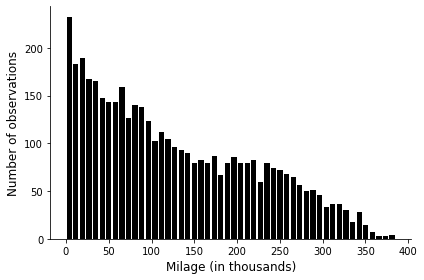

In [5]:
numobs_per_state = trans_results["state_count"].sum(axis=1)
hist_data = np.array([])
for i, val in enumerate(numobs_per_state):
    hist_data = np.append(hist_data, np.full(val, i))
hist_data = hist_data * init_dict["binsize"] / 1000

fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"Number of observations")
ax.set_xlabel(r"Milage (in thousands)")
# ax.set_ylim([0, 1.15 * numobs_per_state[0]])
ax.hist(hist_data, bins=num_bins, color="black", rwidth=0.8)

plt.savefig('{:}/fig-introduction-observations-mileage'.format(DIR_FIGURES))

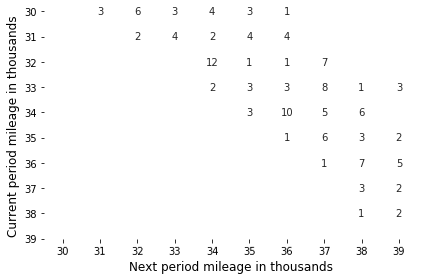

In [6]:
state_mat = trans_results["state_count"]
# trans_mat = state_mat / state_mat.sum(axis=1)[:, None]
# trans_mask = np.ones((state_mat.shape), dtype=bool)
# for i in range(state_mat.shape[0]):
#     trans_mask[i, i: i + len(trans_results['x'])] = False
trans_mask = state_mat == 0
start = 30
end = 40
index = range(start, end, 1)

fig, ax = plt.subplots(1, 1)
sns.heatmap(
    state_mat[start:end, start:end],
    mask=trans_mask[start:end, start:end],
    ax=ax,
    annot=True,
    cmap=ListedColormap(['white']),
#     linewidths=1,
#     linecolor='k',
    cbar=False,
    xticklabels=index,
    yticklabels=index,
)
ax.set_ylabel(r"Current period mileage in thousands")
ax.set_xlabel(r"Next period mileage in thousands")
# ax.set_ylim([start - 1, end + 1])
plt.xticks(rotation=1)
plt.yticks(rotation=0)

plt.savefig('{:}/fig-introduction-transition-matrix'.format(DIR_FIGURES))


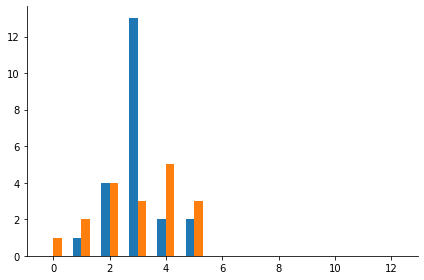

In [33]:
fig, ax = plt.subplots(1, 1)

state_0 = 4
state_1 = 117

width = 0.3
num_bins = len(trans_results["x"])
bins = np.arange(num_bins)

ax.bar(bins - width / 2, state_mat[state_0, state_0: state_0 + num_bins], width)
ax.bar(bins + width / 2, state_mat[state_1, state_1: state_1 + num_bins], width)

fig.savefig(f"{DIR_FIGURES}/fig-introduction-num_transitions")

In [31]:
for i in range(state_mat.shape[0]):
    print(len(np.nonzero(state_mat[i, :])[0]), np.sum(state_mat, axis=1)[i], i)

11 73 0
9 38 1
9 27 2
7 11 3
5 22 4
5 18 5
4 15 6
6 28 7
5 25 8
5 17 9
5 23 10
4 26 11
7 23 12
6 25 13
5 18 14
7 26 15
5 26 16
5 19 17
6 30 18
8 22 19
4 25 20
5 17 21
6 26 22
7 25 23
7 26 24
7 21 25
5 22 26
7 31 27
5 15 28
7 32 29
6 20 30
5 16 31
4 21 32
6 20 33
5 26 34
6 15 35
6 20 36
6 26 37
7 21 38
7 14 39
5 18 40
6 19 41
6 19 42
6 23 43
5 19 44
6 17 45
6 19 46
6 30 47
3 15 48
5 17 49
5 16 50
6 18 51
7 24 52
6 23 53
6 14 54
5 21 55
5 16 56
5 17 57
6 20 58
6 23 59
5 18 60
4 14 61
6 25 62
6 17 63
6 18 64
5 21 65
6 18 66
5 17 67
6 19 68
6 24 69
6 12 70
5 22 71
4 19 72
6 12 73
6 19 74
7 20 75
4 23 76
6 13 77
7 19 78
5 17 79
5 18 80
6 21 81
6 19 82
3 14 83
5 19 84
6 19 85
6 17 86
5 16 87
7 23 88
5 15 89
6 17 90
5 13 91
6 18 92
4 16 93
6 18 94
5 16 95
5 15 96
5 10 97
4 22 98
5 12 99
5 15 100
6 9 101
5 20 102
5 12 103
4 12 104
6 19 105
5 12 106
5 18 107
5 10 108
5 14 109
5 13 110
7 22 111
5 12 112
5 13 113
4 12 114
5 16 115
4 12 116
6 18 117
4 7 118
6 18 119
4 14 120
5 13 121
6 13 122
4 10